# R的常見資料處理方法

## 許sir



- 決大多數我們在資料分析的過程中都比較常用 Data-Frame (資料框架）
- 因此本小節將介紹在 data-frame中的資料清理與處理方式

### [基本資料設定]

- 本文的案例中，賭場的投資者希望利用這些資料（以及各種補充資料）來調整盈利策略。換句話說，什麼能讓老虎機賺更多錢？是機器的主題還是型別？新機器比舊機器或老式機器更有利可圖嗎？機器的位置會產生怎樣的影響？低面額的機器會賺更多錢嗎？

- 包括的資料如
    - 老虎機的位置、錢的面額、月份、日、年、機器型別、機器的年齡、促銷、優惠券、天氣和投幣量（投幣量是放入機器的錢幣總額減去支付的數額）

In [14]:
MyData<- read.csv ("SlotsResults.csv", header=TRUE, sep=",")
head(MyData)


Location,Denomination,Month,Weekday,Type,Theme,Age,Promotion,Coupons,Weather,Coin.in
1st Floor - Front,Penny,Feb,Sunday,5 Reel,Love,18,New Player,None,stormy,9999
1st Floor - Front,Penny,Mar,Tuesday,Progressive,Entertainment,6,Daily Special,None,balmy,1505
1st Floor - Front,Penny,Mar,Sunday,5 Reel,American,3,Daily Special,None,wet,673
1st Floor - Front,Penny,Apr,Tuesday,4 Reel,History,11,VIP,None,steamy,872
1st Floor - Front,Penny,Apr,Friday,Progressive,Holidays,19,VIP,None,frosty,7900
1st Floor - Front,Penny,Apr,Sunday,Progressive,Travel,10,Monthy Player,None,balmy,671


資料來源 James D.Miller撰寫的《資料科學統計學》（Statistics for Data Science）一書，該書由Packt Publishing出版。

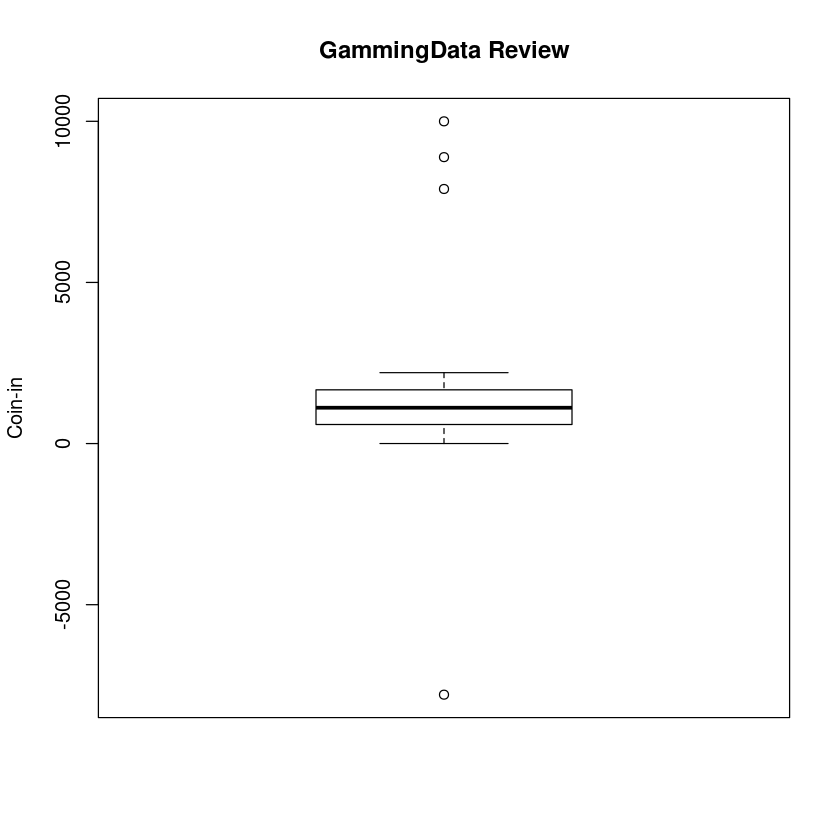

In [18]:
boxplot(MyData[11], main='GammingData Review', ylab = "Coin-in") #R畫出檔案中每個老虎機的Coin-in值

#Coin-in是檔案中的第11列，所以直接將它作為boxplot函式的引數

### [PART 1]: Data Cleaning

### 1-1. 離群值處理

由上圖, 資料中確實存在離群點，我們要解決這些點以保證它們不會對本研究產生負面影響。首先，我們知道Coin-in有負值是不合理的，因為機器輸出的錢幣一定不會比投入到機器中的硬幣多。基於這個原則，我們可以從檔案中刪除Coin-in為負值的記錄。此外，R可以幫助我們用subset生成一個新的資料框，新資料集中只有Coin-in中的非負值。

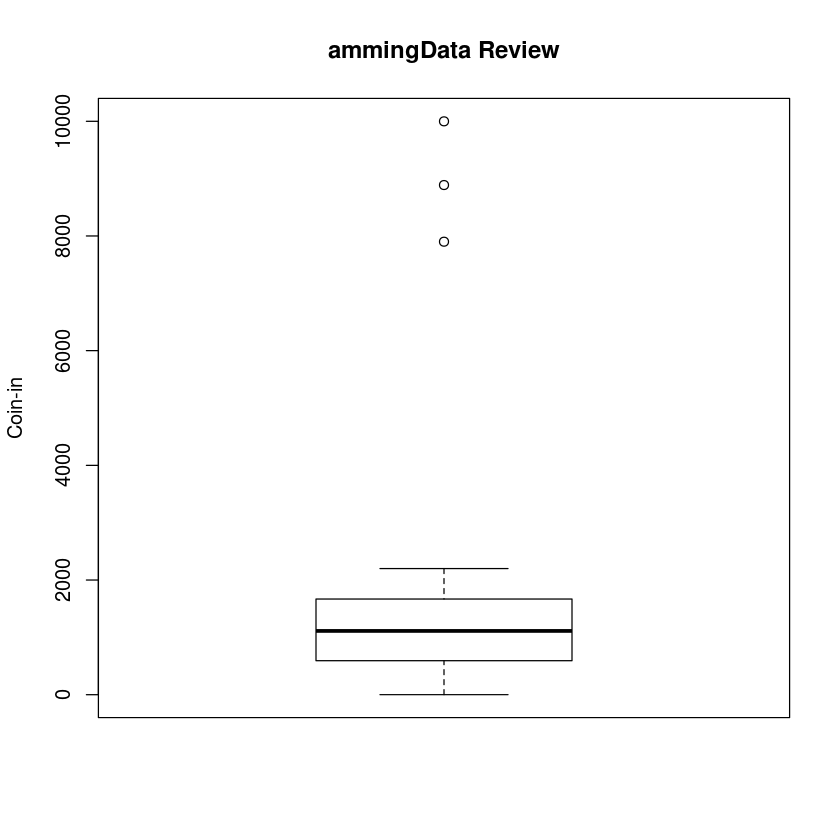

In [21]:
noNegs<- subset(MyData, MyData[11]>0)  # 用subset生成一個新的資料框，新資料集中只有Coin-in中的非負值

boxplot(noNegs[11],main='ammingData Review', ylab = "Coin-in")

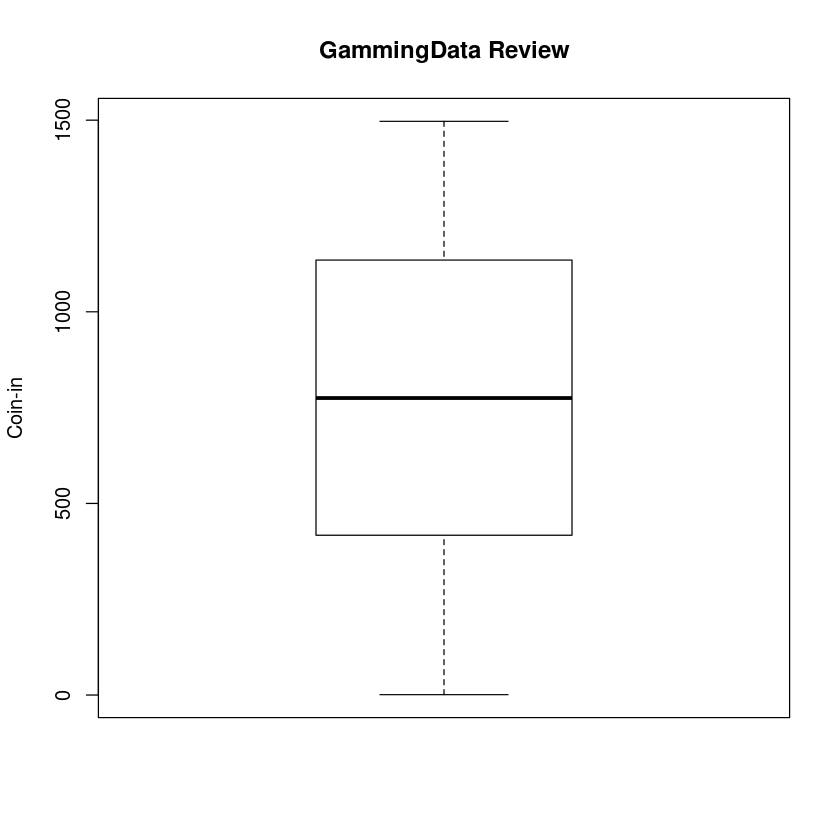

In [24]:
noOutliers<-subset(noNegs, noNegs[11]<1500)  #去除Coin-in中極端的正值（大於1500美元）得到另一個資料子集
boxplot(noOutliers[11], main='GammingData Review', ylab = "Coin-in")

### 1-2. 轉換單位

- 檔案來源：英國
- 使用貨幣：英鎊

In [27]:
MyData$Coin.in<- MyData$Coin.in* 1.4 #只要用數額乘以匯率即可
head(MyData)

Location,Denomination,Month,Weekday,Type,Theme,Age,Promotion,Coupons,Weather,Coin.in
1st Floor - Front,Penny,Feb,Sunday,5 Reel,Love,18,New Player,None,stormy,19598.04
1st Floor - Front,Penny,Mar,Tuesday,Progressive,Entertainment,6,Daily Special,None,balmy,2949.80
1st Floor - Front,Penny,Mar,Sunday,5 Reel,American,3,Daily Special,None,wet,1319.08
1st Floor - Front,Penny,Apr,Tuesday,4 Reel,History,11,VIP,None,steamy,1709.12
1st Floor - Front,Penny,Apr,Friday,Progressive,Holidays,19,VIP,None,frosty,15484.00
1st Floor - Front,Penny,Apr,Sunday,Progressive,Travel,10,Monthy Player,None,balmy,1315.16
